### Import libraries and load datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from commonFunctions import hist

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Load datasets

In [3]:
# based on what columns we deem necessary, may need to rename df/ column names
# need to choose the impt Score/ Rating/ metacritic Matrix defined to be from Beta testers (we've too many)
# standardise release_date if it's impt

userComments1 = pd.read_csv('../dataSources/videoGames/metacritic_game_user_comments (0-100k).csv')
userComments2 = pd.read_csv('../dataSources/videoGames/metacritic_game_user_comments (100-200k).csv')
userComments3 = pd.read_csv('../dataSources/videoGames/metacritic_game_user_comments (200-300k).csv')

gameInfo = pd.read_csv('../dataSources/videoGames/metacritic_game_info.csv')
ratingsAndReleaseDate = pd.read_csv('../dataSources/videoGames/updatedVGOutput.csv')
gameScore = pd.read_excel('../dataSources/videoGames/metascore-video-games-1986-2023.xlsx', sheet_name='Sheet1')
gameSales = pd.read_excel('../dataSources/videoGames/Video game sales - 2000 - 2020.xlsx', sheet_name= 'Sheet1')

C:\Users\Michael\AppData\Local\Temp\ipykernel_33092\3980805325.py:5: DtypeWarning: Columns (1,2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  userComments1 = pd.read_csv('../dataSources/videoGames/metacritic_game_user_comments (0-100k).csv')
C:\Users\Michael\AppData\Local\Temp\ipykernel_33092\3980805325.py:6: DtypeWarning: Columns (1,2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  userComments2 = pd.read_csv('../dataSources/videoGames/metacritic_game_user_comments (100-200k).csv')


In [4]:
# userComments[~(userComments.Title.isin(gameSales.title))].groupby('Title').count().sort_values(by = 'Comment', ascending = False)

In [5]:
# can join via title/name
print(f"userComments1: {userComments1.columns}\n\ngameInfo:{gameInfo.columns}\n\nratingsAndReleaseDate: {ratingsAndReleaseDate.columns}\n\ngameScore: {gameScore.columns}\n\ngameSales: {gameSales.columns}")

userComments1: Index(['Unnamed: 0', 'Title', 'Platform', 'Userscore', 'Comment', 'Username'], dtype='object')

gameInfo:Index(['Unnamed: 0', 'Title', 'Year', 'Developer', 'Genre', 'Platform',
       'Metascore', 'Avg_Userscore', 'No_Players', 'Platform1'],
      dtype='object')

ratingsAndReleaseDate: Index(['name', 'platform', 'platform1', 'user_rating', 'critic_rating',
       'release_date', 'summary', 'description', 'metacritic'],
      dtype='object')

gameScore: Index(['no', 'name', 'platform', 'platform1', 'release_date', 'user_score',
       'meta_score', 'summary'],
      dtype='object')

gameSales: Index(['title', 'platform', 'genre', 'publisher', 'vg_score', 'critic_score',
       'user_score', 'total_shipped', 'aisan_sales', 'north_american_sales',
       'japan_sales', 'european_sales', 'global_sales', 'Production Cost',
       'release_year', 'Developer_metacritic_game_info',
       'Genre_metacritic_game_info', 'Metascore_metacritic_game_info',
       'Avg_Userscore_meta

In [6]:
# some users commented & gave rating more than once per game and platform (unique only when combine all cols)
userComments1.head()

,Unnamed: 0,Title,Platform,Userscore,Comment,Username
0,0.0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,"Everything in OoT is so near at perfection, it...",SirCaestus
1,1.0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,I won't bore you with what everyone is already...,Kaistlin
2,2.0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,3.0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,I'm one of those people who think that this is...,doodlerman
4,4.0,The Legend of Zelda: Ocarina of Time,Nintendo64,10.0,This game is the highest rated game on Metacr...,StevenA


In [7]:
# (gameInfo.Title + gameInfo.Year.astype(str) + gameInfo.Publisher + gameInfo.Genre + gameInfo.Platform).nunique()
gameInfo.head()

,Unnamed: 0,Title,Year,Developer,Genre,Platform,Metascore,Avg_Userscore,No_Players,Platform1
0,3145,007 The World is not Enough,2000,EurocomEntertainmentSoftware,Action;Shooter;First-Person;Modern,Nintendo64,81,7.8,1-Apr,0
1,2589,10 Second Ninja X,2016,GameDesignDan,Action;Platformer;2D,XboxOne,82,4.5,not specified,0
2,4465,1001 Spikes,2014,Nicalis,Action;Platformer;Platformer;2D;2D,PlayStation4,78,6.6,not specified,PS4
3,3896,1701 A.D.,2006,RelatedDesigns,Strategy;Real-Time;Historic;General;Historic,PC,79,8.4,4 Online,PC
4,3716,1979 Revolution Black Friday,2016,"N-FusionInteractiveEntertainmentCorp.,iNKStories",Adventure;General,PC,80,7.7,No Online Multiplayer,PC


In [8]:
# ratingsAndReleaseDate.name.nunique()
ratingsAndReleaseDate.head()
# ratingsAndReleaseDate.shape = 209

,name,platform,platform1,user_rating,critic_rating,release_date,summary,description,metacritic
0,Full Throttle,PC,PC,8.5,86,"April 30, 1995","You're Ben--beaten, framed for murder and left...","<p>One minute you&#39;re on the road, riding. ...",86.0
1,Sid Meier's Civilization II,PC,PC,8.7,94,"February 29, 1996",An empire-building turn-based strategy game. T...,"<p>Make every critical social, economic and po...",94.0
2,Quake,PC,PC,8.8,94,"June 22, 1996",Rage through 32 single player levels and 6 dea...,<h3>The roots</h3>\r\n<p>One of the classic re...,94.0
3,Diablo,PC,PC,8.6,94,"December 31, 1996",The kingdom of Khandaras has fallen into chaos...,"<p>Traveler, stay awhile and listen...</p>\r\n...",94.0
4,Super Mario 64,Nintendo 64,NaN,9.1,94,"September 26, 1996",Mario is super in a whole new way! Combining t...,<p>Mario is super in a whole new way! Combinin...,94.0


In [9]:
gameScore.head()

,no,name,platform,platform1,release_date,user_score,meta_score,summary
0,0,Like a Dragon: Ishin!,Xbox Series X,NaN,2023-02-18,NaN,80.0,"1860s Kyo is plagued by widespread inequality,..."
1,1,FinalFort,PC,PC,2023-02-18,NaN,NaN,"You will be humanity's last hope, building a w..."
2,2,Like a Dragon: Ishin!,Xbox One,NaN,2023-02-18,NaN,NaN,"1860s Kyo is plagued by widespread inequality,..."
3,3,Tales of Symphonia Remastered,PlayStation 4,PS4,2023-02-17,NaN,68.0,"In a dying world, legend has it that a Chosen ..."
4,4,Tales of Symphonia Remastered,Switch,0,2023-02-17,NaN,68.0,"In a dying world, legend has it that a Chosen ..."


In [10]:
gameSales.head()

,title,platform,genre,publisher,vg_score,critic_score,user_score,total_shipped,aisan_sales,north_american_sales,japan_sales,european_sales,global_sales,Production Cost,release_year,Developer_metacritic_game_info,Genre_metacritic_game_info,Metascore_metacritic_game_info,Avg_Userscore_metacritic_game_info,No. of players_metacritic_game_info,releasedate_1986-2023,releasedate_VGOutput,releasedate_raw,releasedate_quarter,releasedate_link
0,(c 12) Final Resistance,PS,Shooter,IBM,1.0,6.5,4.0,8.0,5.08,1.10,5.70,3.54,15.42,1.98,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,https://www.google.com/search?q=(c 12) Final R...
1,.hack Sekai no Mukou ni Versus,PS3,Fighting,IBM,6.0,10.0,6.0,269.0,3.00,1.86,0.03,6.43,8.35,3.34,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,https://www.google.com/search?q=.hack Sekai no...
2,007 Quantum of Solace,PS2,Shooter,Activision,8.0,7.8,4.0,81.0,3.00,0.17,1.21,2.22,4.03,2.05,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,https://www.google.com/search?q=007 Quantum of...
3,007 Quantum of Solace,PS3,Shooter,Activision,3.0,6.6,10.0,158.0,1.14,0.43,0.02,0.51,2.10,1.19,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,https://www.google.com/search?q=007 Quantum of...
4,007 The World is not Enough,PS,Shooter,Electronic Arts,1.0,6.4,1.0,240.0,3.00,0.51,3.75,0.35,5.53,1.50,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,https://www.google.com/search?q=007 The World ...


### userComments

In [11]:
# userComments.groupby('Title').first().sort_values(by = 'Title').reset_index()

In [12]:
userComments3['Unnamed: 0'] = userComments3['Unnamed: 0'].astype('float64')
userComments3['Userscore'] = userComments3['Userscore'].astype('float64')

userComments = pd.concat([userComments1, userComments2, userComments3], axis = 0)
userComments.drop(columns = 'Unnamed: 0', inplace = True)
userComments.dropna(how = 'all', inplace = True)

In [13]:
# Comments >> 23 missing entries
# Username   >> 3 missing entries
userComments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283983 entries, 0 to 83981
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Title      283983 non-null  object 
 1   Platform   283983 non-null  object 
 2   Userscore  283983 non-null  float64
 3   Comment    283960 non-null  object 
 4   Username   283980 non-null  object 
dtypes: float64(1), object(4)
memory usage: 13.0+ MB


In [14]:
userComments.describe()

,Userscore
count,283983.000000
mean,7.618308
std,3.131767
min,0.000000
25%,7.000000
50%,9.000000
75%,10.000000
max,10.000000


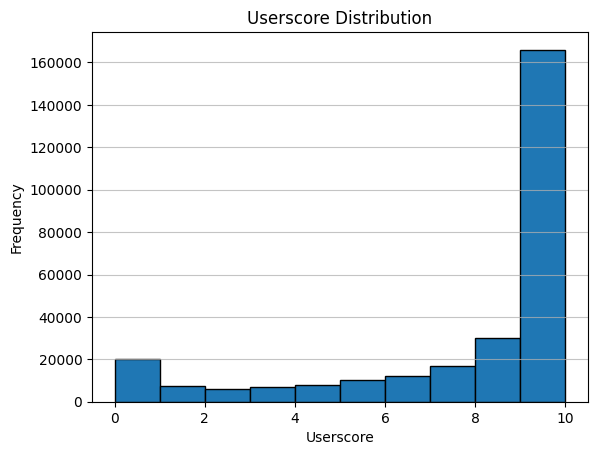

In [15]:
hist(userComments, 'Userscore')

In [16]:
userComments.sample(10)

,Title,Platform,Userscore,Comment,Username
38924,BioShock Infinite,PC,0.0,"Terrible game, with 10 years old graphics, one...",Sirik_Matak
37967,Call of Duty 4: Modern Warfare,Xbox360,9.0,Very good game. Pretty much the role-model for...,JoeMtW
80328,Halo: Reach,Xbox360,10.0,The annoying additional level after the last l...,miramax123
4666,DOOM,PC,9.0,Old school action at it's best. Frenetic actio...,Wihglah
33349,Final Fantasy Tactics: The War of the Lions,PSP,5.0,Why is this game getting such great scores? B...,MaxC.
29421,Uncharted: Drake's Fortune,PlayStation3,5.0,The game has got a lot of good ideas like puzz...,Daniel0918
40645,Halo 3,Xbox360,10.0,It is one of the best game I ever played. Epic...,Gregorio9
56796,Puzzle Quest: Challenge of the Warlords,DS,9.0,Don't listen to the folks at Nintendo Power. ...,ThomasP
78946,Tom Clancy's Ghost Recon: Island Thunder,Xbox,10.0,This Game Is Awesome!.....Whoever thinks this...,Justin
47150,BioShock Infinite,Xbox360,10.0,"I've been a gamer for over 20 years, and durin...",Damocles693


In [17]:
userComments.shape

(283983, 5)

In [18]:
# some users commented & gave rating more than once per game and platform
(userComments.Title + userComments.Platform + userComments.Username).nunique()

281300

In [19]:
title_counts = userComments.groupby('Title')['Comment'].count().reset_index().sort_values(by = 'Comment', ascending = False).head(10)
title_platform_counts = userComments.groupby(['Title', 'Platform'])['Comment'].count().reset_index()
title_platform_counts = pd.merge(title_counts[['Title']], title_platform_counts, how = 'left', on = 'Title')

df = title_platform_counts.copy()

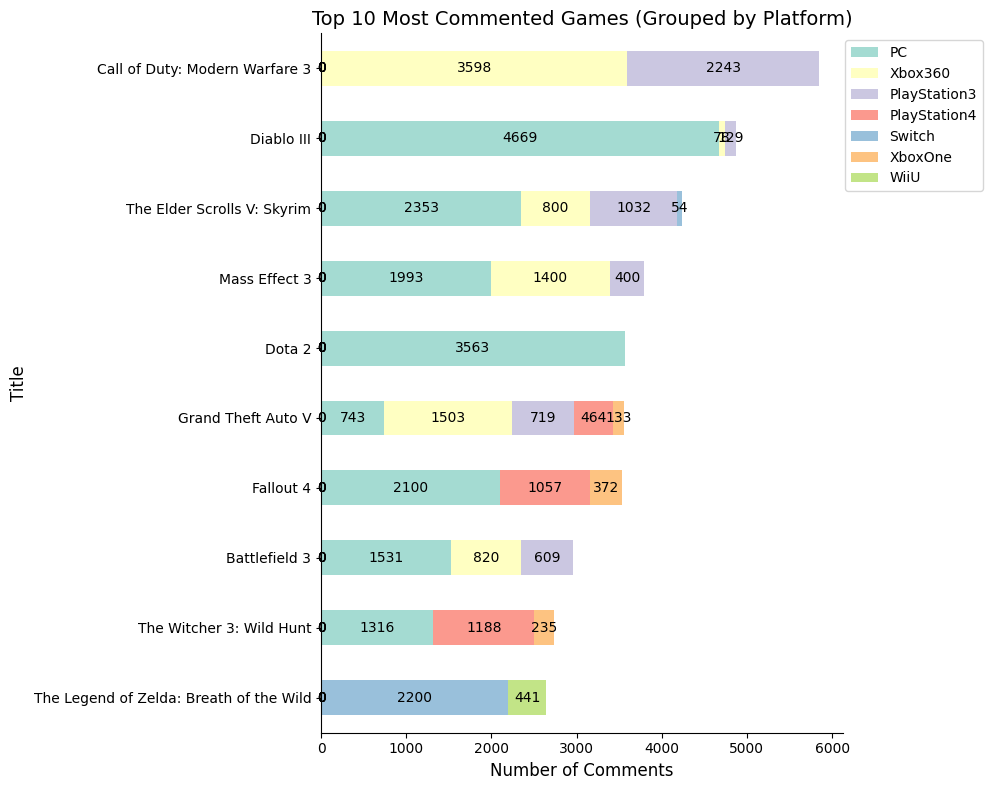

In [20]:
# Pivot the data to create a DataFrame suitable for a stacked bar chart
pivot_df = df.pivot(index='Title', columns='Platform', values='Comment')

# Sort by the total number of comments in descending order
sorted_titles = pivot_df.sum(axis=1).sort_values().index
pivot_df = pivot_df.loc[sorted_titles]

# Sort platforms by the total number of comments
sorted_platforms = pivot_df.sum().sort_values(ascending=False).index
pivot_df = pivot_df[sorted_platforms]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Use a Seaborn color palette for better colors
colors = sns.color_palette("Set3", n_colors=len(pivot_df.columns))

# Plot the stacked bar chart
bars = pivot_df.plot(kind='barh', stacked=True, color=colors, alpha=0.8, ax=ax)

ax.set_xlabel('Number of Comments', fontsize=12)
ax.set_ylabel('Title', fontsize=12)
ax.set_title('Top 10 Most Commented Games (Grouped by Platform)', fontsize=14)
ax.spines[['right', 'top']].set_visible(False)

# Add data labels to the bars
for container in bars.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center', fontsize=10, color='black')

# Add legends
ax.legend(loc='upper left', bbox_to_anchor=(0.99, 1), labels=sorted_platforms, fontsize=10)

plt.tight_layout()
plt.show()


In [21]:
df = userComments.copy()

In [22]:
noOfComments = df.groupby(['Username', 'Platform']).count().reset_index()
noOfComments.drop(columns = ['Title', 'Userscore'], inplace = True)
noOfComments['Comment'] = noOfComments.Comment.astype('object')

In [23]:
# Group by Platform and Comment and calculate percentage
grouped = df.groupby(['Platform', 'Comment']).size().reset_index(name='Count')
total_comments = grouped['Count'].sum()
grouped['Percentage'] = (grouped['Count'] / total_comments) * 100

# Create a treemap
fig = px.treemap(grouped, 
                 path=['Platform', 'Comment'], 
                 values='Percentage', 
                 title='Treemap of Comments by Platform and Comment',
                 hover_data=['Percentage'],  # Display percentage in hover
                 color_discrete_sequence=px.colors.qualitative.Pastel,
                 width=800, height=500)

# # Customize hover template to show percentage values
# fig.update_traces(textinfo='label+percent parent')

# Update treemap layout
fig.update_layout(
    margin=dict(t=40, b=0, l=0, r=0),
    treemapcolorway=px.colors.qualitative.Pastel,
    uniformtext=dict(minsize=10),
    hoverlabel=dict(bgcolor='white', font_size=14),
    title=dict(text='Proportion of Comments by Platform (Top 6)', font=dict(size=20, color='black'), x=0.5)
)

# Show the treemap
fig.show()

In [ ]:
df = userComments.copy()
platformList = df.groupby('Platform')['Comment'].count().reset_index().sort_values(by = 'Comment', ascending = False).head(6).Platform.to_list()
df = userComments[userComments.Platform.isin(platformList)]

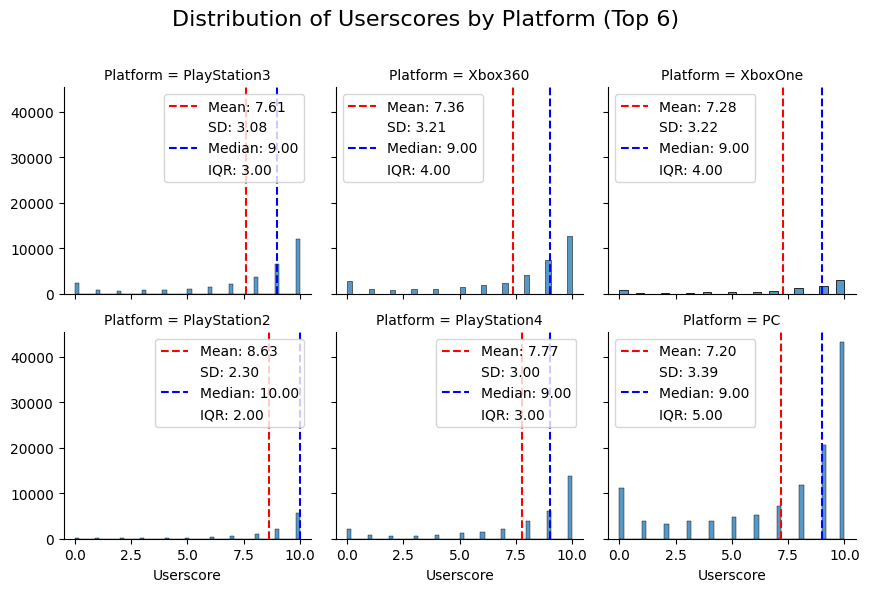

In [ ]:
# Create a facet grid with Seaborn
g = sns.FacetGrid(df, col='Platform', col_wrap=3)
g.map(sns.histplot, 'Userscore', kde=False)

# Add labels for mean, median, SD, and IQR
for platform, ax in zip(df['Platform'].unique(), g.axes):
    platform_data = df[df['Platform'] == platform]['Userscore']
    mean = platform_data.mean()
    median = platform_data.median()
    std_dev = platform_data.std()
    iqr = platform_data.quantile(0.75) - platform_data.quantile(0.25)
    
    ax.axvline(mean, color='red', linestyle='dashed', label=f'Mean: {mean:.2f}')
    ax.axvline(std_dev, color='green', linestyle='dashed', alpha= 0, label=f'SD: {std_dev:.2f}')
    ax.axvline(median, color='blue', linestyle='dashed', label=f'Median: {median:.2f}')
    ax.axvline(iqr, color='orange', linestyle='dashed', alpha = 0, label=f'IQR: {iqr:.2f}')
    ax.legend()

# Adjust plot aesthetics
g.set_axis_labels('Userscore', '')
g.fig.suptitle('Distribution of Userscores by Platform (Top 6)', fontsize=16)
g.set(ylim=(0, None))

# Show the plot
plt.subplots_adjust(top=0.85)
plt.show()

### gameInfo

In [ ]:
gameInfo.drop(columns = 'Unnamed: 0', inplace = True)

In [ ]:
gameInfo.loc[gameInfo.Metascore == 'not specified', 'Metascore'] = -999
gameInfo['Metascore'] = gameInfo.Metascore.astype('float64')

gameInfo.loc[gameInfo.Avg_Userscore == 'not specified', 'Avg_Userscore'] = -999
gameInfo.loc[gameInfo.Avg_Userscore == 'tbd', 'Avg_Userscore'] = -998
gameInfo['Avg_Userscore'] = gameInfo.Avg_Userscore.astype('float64')

gameInfo.loc[gameInfo.Year == 'not specified', 'Year'] = -999
gameInfo['Year'] = gameInfo.Year.astype('int64')

In [ ]:
gameInfo = gameInfo[gameInfo.Year != -999] # 11 rows removed (all Metascore = -999 are removed too)
gameInfo = gameInfo[gameInfo.Avg_Userscore != -999] # 1 row removed

gameInfo[gameInfo.Avg_Userscore == -998].shape # 75 rows .. keep? not sure if this col is impt

(75, 9)

In [ ]:
# No_Players >> 52 categories .. combine them??
gameInfo.No_Players.value_counts().shape
# gameInfo.No_Players.value_counts()

(52,)

In [ ]:
# gameInfo.No_Players.value_counts()

In [ ]:
# No_Players .. 7 missing entries
gameInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4988 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          4988 non-null   object 
 1   Year           4988 non-null   int64  
 2   Developer      4988 non-null   object 
 3   Genre          4988 non-null   object 
 4   Platform       4988 non-null   object 
 5   Metascore      4988 non-null   float64
 6   Avg_Userscore  4988 non-null   float64
 7   No_Players     4981 non-null   object 
 8   Platform1      4988 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 389.7+ KB


In [ ]:
gameInfo.Metascore.describe()

count    4988.000000
mean       83.123697
std         4.342992
min        77.000000
25%        80.000000
50%        82.000000
75%        86.000000
max        99.000000
Name: Metascore, dtype: float64

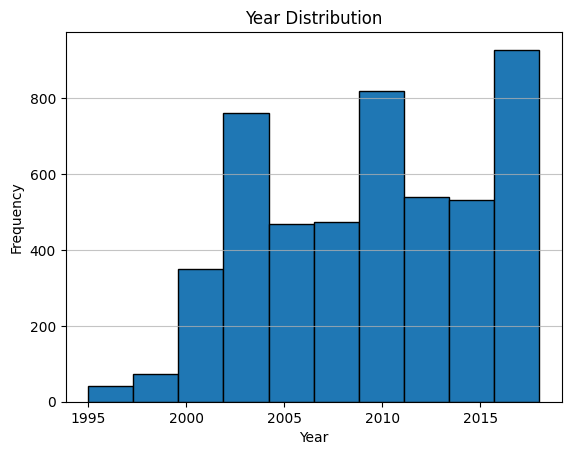

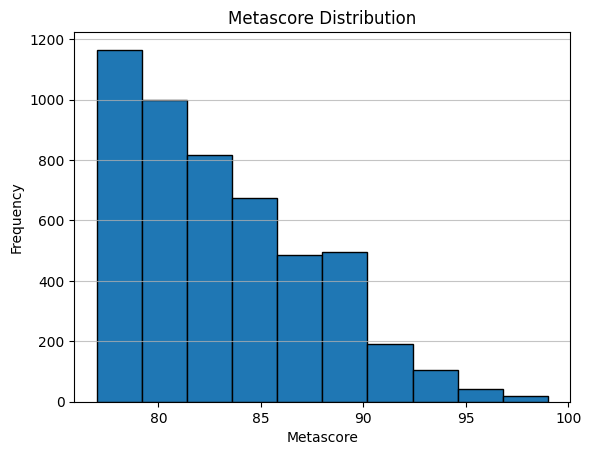

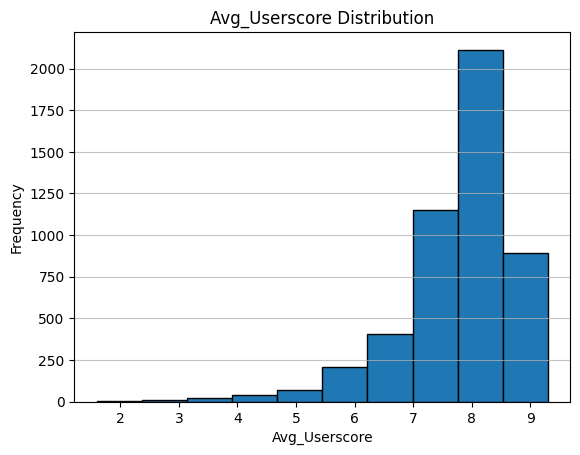

In [ ]:
for x in gameInfo.select_dtypes(include=['Int64', 'float64']):
    if x == 'Avg_Userscore':
        test = gameInfo[gameInfo[x] != -998]
        hist(test, x)
    else:
        hist(gameInfo, x)

In [ ]:
gameInfo.head()

,Title,Year,Developer,Genre,Platform,Metascore,Avg_Userscore,No_Players,Platform1
0,007 The World is not Enough,2000,EurocomEntertainmentSoftware,Action;Shooter;First-Person;Modern,Nintendo64,81.0,7.8,1-Apr,0
1,10 Second Ninja X,2016,GameDesignDan,Action;Platformer;2D,XboxOne,82.0,4.5,not specified,0
2,1001 Spikes,2014,Nicalis,Action;Platformer;Platformer;2D;2D,PlayStation4,78.0,6.6,not specified,PS4
3,1701 A.D.,2006,RelatedDesigns,Strategy;Real-Time;Historic;General;Historic,PC,79.0,8.4,4 Online,PC
4,1979 Revolution Black Friday,2016,"N-FusionInteractiveEntertainmentCorp.,iNKStories",Adventure;General,PC,80.0,7.7,No Online Multiplayer,PC


In [ ]:
gameInfo.shape

(4988, 9)

In [ ]:
gameInfo.Title.nunique()

3423

In [ ]:
(gameInfo.Title + gameInfo.Year.astype(str) + gameInfo.Developer + gameInfo.Genre + gameInfo.Platform).nunique()

4988

### ratingsAndReleaseDate

In [ ]:
ratingsAndReleaseDate.head()

,name,platform,platform1,user_rating,critic_rating,release_date,summary,description,metacritic
0,Full Throttle,PC,PC,8.5,86,"April 30, 1995","You're Ben--beaten, framed for murder and left...","<p>One minute you&#39;re on the road, riding. ...",86.0
1,Sid Meier's Civilization II,PC,PC,8.7,94,"February 29, 1996",An empire-building turn-based strategy game. T...,"<p>Make every critical social, economic and po...",94.0
2,Quake,PC,PC,8.8,94,"June 22, 1996",Rage through 32 single player levels and 6 dea...,<h3>The roots</h3>\r\n<p>One of the classic re...,94.0
3,Diablo,PC,PC,8.6,94,"December 31, 1996",The kingdom of Khandaras has fallen into chaos...,"<p>Traveler, stay awhile and listen...</p>\r\n...",94.0
4,Super Mario 64,Nintendo 64,NaN,9.1,94,"September 26, 1996",Mario is super in a whole new way! Combining t...,<p>Mario is super in a whole new way! Combinin...,94.0


In [ ]:
# unique names!
ratingsAndReleaseDate.shape
ratingsAndReleaseDate.name.nunique()

209

### gameScore

In [ ]:
gameScore.user_score.count()
gameScore.meta_score.count()
gameScore.shape

(121050, 8)

In [ ]:
(gameScore.name + gameScore.platform + gameScore.release_date.astype(str)).nunique()

120964

### gameSales

In [ ]:
gameSales.shape

(8896, 25)

In [ ]:
(gameSales.title + gameSales.platform + gameSales.genre + gameSales.publisher).nunique()

8881